<a href="https://colab.research.google.com/github/yxrellx/Algoritmos/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd

In [77]:
df = pd.read_csv('/content/elinar.csv')
df

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area,quimio_terapia(2),radio_terapia(2)
0,2,43,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1,Positve,...,1,0,0,0,1,1,0,0.000276,SI,SI
1,8,76,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1,Positve,...,0,2,0,1,1,1,1,0.002373,No,SI
2,10,78,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1,Positve,...,0,3,1,0,1,1,1,0.003653,SI,SI
3,28,86,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1,Positve,...,0,2,0,0,0,1,2,0.000916,SI,SI
4,35,84,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,Her2,1,Negative,...,0,1,1,0,0,1,1,0.001644,SI,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,7278,67,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,4,Positve,...,0,1,1,0,1,5,2,0.012834,SI,No
1512,7280,63,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,4,Positve,...,0,3,1,0,1,4,0,0.023726,SI,No
1513,7284,61,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,4,Positve,...,0,10,0,0,0,5,2,0.012834,SI,No
1514,7286,66,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4,Positve,...,0,1,1,0,0,4,2,0.036559,SI,No


In [78]:
df =df.drop(['patient_id','type_of_breast_surgery','cancer_type','cancer_type_detailed',"cellularity","pam50_+_claudin-low_subtype","er_status_measured_by_ihc","er_status", "her2_status_measured_by_snp6", "her2_status", "tumor_other_histologic_subtype", "inferred_menopausal_state","integrative_cluster", "primary_tumor_laterality","oncotree_code","pr_status","3-gene_classifier_subtype", "death_from_cancer","quimio_terapia(2)", "radio_terapia(2)"],axis=1)
df

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,her2_status (2),tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area
0,43,0,1,3,1,0,2,0.000065,8.466155e-01,1,...,0,0,1,0,0,0,1,1,0,0.000276
1,76,1,1,3,1,8,2,0.000099,4.138046e-01,0,...,0,1,0,2,0,1,1,1,1,0.002373
2,78,0,1,3,1,0,4,0.006730,7.802601e-09,0,...,0,0,0,3,1,0,1,1,1,0.003653
3,86,0,1,3,1,1,5,0.008339,3.657886e-01,0,...,0,0,0,2,0,0,0,1,2,0.000916
4,84,0,1,2,0,0,1,0.005066,3.627876e-01,0,...,0,2,0,1,1,0,0,1,1,0.001644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,67,0,4,2,1,1,3,0.000065,2.410804e-08,0,...,0,0,0,1,1,0,1,5,2,0.012834
1512,63,0,4,2,1,6,6,0.000083,1.955985e-01,1,...,0,0,0,3,1,0,1,4,0,0.023726
1513,61,0,4,3,1,1,5,0.000082,2.030677e-08,0,...,0,0,0,10,0,0,0,5,2,0.012834
1514,66,0,4,3,1,3,2,0.000082,1.586862e-01,0,...,0,0,0,1,1,0,0,4,2,0.036559


In [4]:
X = df.copy()
X = X.drop(['death_from_cancer (2)'], axis=1)
X

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,her2_status_measured_by_snp6 (2),her2_status (2),tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),tumor_area
0,43,0,1,3,1,0,2,0.000065,8.466155e-01,1,...,0,0,0,1,0,0,0,1,1,0.000276
1,76,1,1,3,1,8,2,0.000099,4.138046e-01,0,...,0,0,1,0,2,0,1,1,1,0.002373
2,78,0,1,3,1,0,4,0.006730,7.802601e-09,0,...,0,0,0,0,3,1,0,1,1,0.003653
3,86,0,1,3,1,1,5,0.008339,3.657886e-01,0,...,2,0,0,0,2,0,0,0,1,0.000916
4,84,0,1,2,0,0,1,0.005066,3.627876e-01,0,...,1,0,2,0,1,1,0,0,1,0.001644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,67,0,4,2,1,1,3,0.000065,2.410804e-08,0,...,0,0,0,0,1,1,0,1,5,0.012834
1512,63,0,4,2,1,6,6,0.000083,1.955985e-01,1,...,0,0,0,0,3,1,0,1,4,0.023726
1513,61,0,4,3,1,1,5,0.000082,2.030677e-08,0,...,0,0,0,0,10,0,0,0,5,0.012834
1514,66,0,4,3,1,3,2,0.000082,1.586862e-01,0,...,0,0,0,0,1,1,0,0,4,0.036559


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['death_from_cancer (2)'],
                                                    test_size=0.2, random_state=42
                                                    )

In [70]:
X_train

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,her2_status_measured_by_snp6 (2),her2_status (2),tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),tumor_area
1193,40,1,3,3,0,1,11,0.000082,9.253084e-09,0,...,2,1,2,1,5,1,2,0,6,0.016553
226,56,1,1,3,0,0,4,0.006710,7.229076e-01,1,...,0,0,0,0,7,0,0,0,0,0.001402
1066,57,0,3,3,1,0,10,0.006677,2.373458e-01,1,...,0,0,2,0,4,0,2,0,0,0.000397
746,57,0,3,3,1,0,4,0.000066,2.455819e-08,1,...,0,0,2,0,1,1,2,1,5,0.002979
853,68,0,3,2,1,1,3,0.000065,2.512838e-08,0,...,0,0,7,0,1,1,0,1,5,0.001159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,72,0,1,1,1,0,8,0.000033,9.299767e-01,0,...,0,0,5,0,0,0,5,0,0,0.002373
1239,65,0,5,2,0,0,5,0.000049,1.432144e-01,0,...,0,0,0,0,6,0,0,1,5,0.024860
139,50,0,1,3,0,0,4,0.000066,1.829610e-08,1,...,0,0,0,0,7,1,0,0,0,0.001766
1140,65,0,3,1,0,0,5,0.000032,1.237746e-01,1,...,0,0,7,0,0,0,0,1,5,0.000579


In [71]:
X_test

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,her2_status_measured_by_snp6 (2),her2_status (2),tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),tumor_area
1142,74,0,3,2,0,0,7,0.000049,1.646549e-08,0,...,0,0,1,0,1,1,1,1,4,0.000428
748,65,0,3,3,0,0,11,0.000066,2.170724e-09,0,...,0,1,0,0,8,1,0,0,0,0.002069
138,56,1,1,2,1,3,5,0.000066,1.862621e-08,1,...,2,0,0,0,10,0,0,0,5,0.002979
468,69,0,2,3,1,0,6,0.000065,2.222741e-08,0,...,0,0,0,0,10,1,0,0,5,0.000731
975,48,0,3,2,0,0,6,0.000049,1.765589e-08,1,...,0,1,5,1,1,0,5,1,5,0.000428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,46,0,3,2,1,0,14,0.000049,1.554185e-01,0,...,0,0,0,1,1,1,0,1,5,0.012834
1183,68,0,3,3,1,4,5,0.000099,9.063021e-09,0,...,0,0,1,0,9,0,1,1,5,0.001766
1298,70,0,5,1,0,0,4,0.003401,7.495832e-01,0,...,2,0,0,0,3,0,0,1,4,0.019038
1459,52,0,4,8,1,0,2,0.005036,1.353785e-01,1,...,0,0,0,0,2,1,0,1,4,0.010434


In [72]:
y_train

1193    1
226     0
1066    0
746     0
853     2
       ..
338     2
1239    1
139     0
1140    0
1068    0
Name: death_from_cancer (2), Length: 1212, dtype: int64

In [73]:
y_test

1142    1
748     1
138     0
468     2
975     0
       ..
1191    2
1183    1
1298    2
1459    0
128     0
Name: death_from_cancer (2), Length: 304, dtype: int64

RANDOM FOREST


In [17]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc: 0.8256578947368421
precision: 0.7879416851989127
recall: 0.785562015503876
f1: 0.8256578947368421


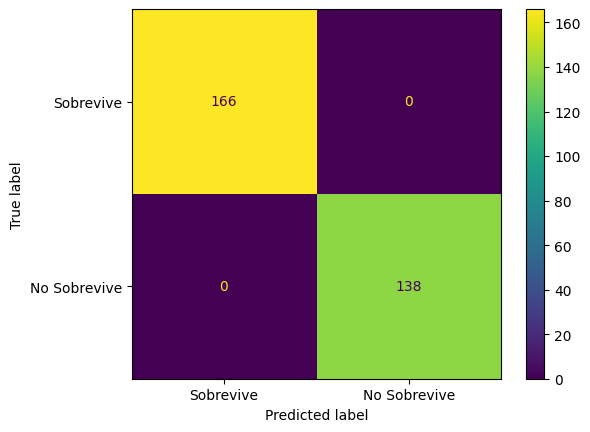

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion = multilabel_confusion_matrix(y_test,y_pred)
print(f"acc: {accuracy_score(y_test,y_pred)}")
print(f"precision: {precision_score(y_test,y_pred,average='macro')}")
print(f"recall: {recall_score(y_test,y_pred,average='macro')}")
print(f"f1: {f1_score(y_test,y_pred,average='micro')}")
confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['Sobrevive','No Sobrevive']).plot(values_format='d')

MEJORA- Muerte por cancer

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['death_from_cancer (2)'],
                                                    test_size=0.2, random_state=63
                                                    )

In [74]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc: 0.8355263157894737
precision: 0.7887652358240594
recall: 0.789272030651341
f1: 0.8355263157894737


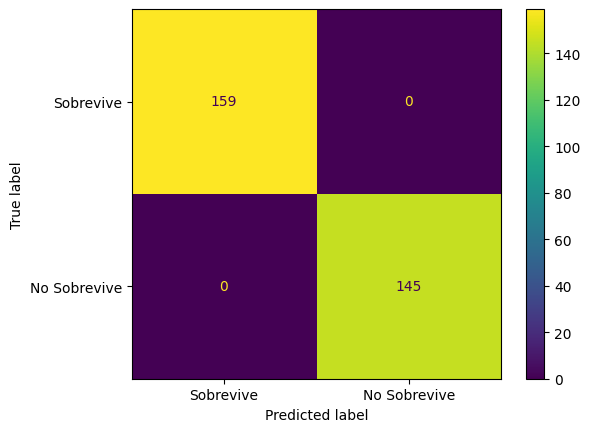

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion = multilabel_confusion_matrix(y_test,y_pred)
print(f"acc: {accuracy_score(y_test,y_pred)}")
print(f"precision: {precision_score(y_test,y_pred,average='macro')}")
print(f"recall: {recall_score(y_test,y_pred,average='macro')}")
print(f"f1: {f1_score(y_test,y_pred,average='micro')}")
confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['Sobrevive','No Sobrevive']).plot(values_format='d')

Quimioterapia

In [123]:
X = df.copy()
X = X.drop(['chemotherapy'], axis=1)
X

,age_at_diagnosis,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,...,her2_status (2),tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area
0,43,1,3,1,0,2,0.000065,8.466155e-01,1,1,...,0,0,1,0,0,0,1,1,0,0.000276
1,76,1,3,1,8,2,0.000099,4.138046e-01,0,1,...,0,1,0,2,0,1,1,1,1,0.002373
2,78,1,3,1,0,4,0.006730,7.802601e-09,0,1,...,0,0,0,3,1,0,1,1,1,0.003653
3,86,1,3,1,1,5,0.008339,3.657886e-01,0,1,...,0,0,0,2,0,0,0,1,2,0.000916
4,84,1,2,0,0,1,0.005066,3.627876e-01,0,0,...,0,2,0,1,1,0,0,1,1,0.001644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,67,4,2,1,1,3,0.000065,2.410804e-08,0,0,...,0,0,0,1,1,0,1,5,2,0.012834
1512,63,4,2,1,6,6,0.000083,1.955985e-01,1,0,...,0,0,0,3,1,0,1,4,0,0.023726
1513,61,4,3,1,1,5,0.000082,2.030677e-08,0,0,...,0,0,0,10,0,0,0,5,2,0.012834
1514,66,4,3,1,3,2,0.000082,1.586862e-01,0,0,...,0,0,0,1,1,0,0,4,2,0.036559


In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['chemotherapy'],
                                                    test_size=0.2, random_state=42
                                                    )

In [132]:
X_train

,age_at_diagnosis,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,...,her2_status (2),tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area
257,57,1,2,0,0,1,0.000049,8.692898e-09,1,1,...,0,0,0,1,0,0,1,5,0,0.000428
577,43,2,3,1,0,6,0.006720,2.372124e-01,1,1,...,1,0,1,8,1,0,0,4,0,0.000792
1087,68,3,3,0,0,4,0.000065,1.946315e-01,1,1,...,0,0,0,7,1,0,0,0,0,0.000579
1224,51,3,3,1,1,7,0.008375,2.100700e-09,0,1,...,0,1,0,1,0,1,0,0,1,0.019038
861,63,3,1,0,0,8,0.003457,5.275092e-01,0,1,...,0,5,0,8,0,5,0,4,1,0.002555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,43,3,3,0,13,5,0.000098,1.563855e-01,0,1,...,0,0,1,4,1,0,0,0,1,0.001159
1103,49,3,1,0,0,6,0.000032,2.405135e-01,1,1,...,0,1,1,3,1,1,1,5,0,0.000385
406,68,2,1,0,0,4,0.003378,2.344115e-01,0,0,...,0,0,0,6,0,0,1,5,2,0.000549
1029,66,3,2,1,1,7,0.006707,1.023341e-08,0,1,...,0,1,0,9,0,1,0,4,1,0.001341


In [133]:
X_test

,age_at_diagnosis,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,...,her2_status (2),tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area
653,71,3,3,0,0,9,0.000065,2.066355e-01,0,0,...,0,0,0,2,1,0,0,0,2,0.000522
654,69,3,2,0,0,10,0.000048,2.648550e-01,0,1,...,0,0,0,3,1,0,1,4,2,0.000276
1435,37,4,2,1,5,6,0.008345,1.013004e-01,1,1,...,0,0,1,1,0,0,1,5,0,0.013677
807,40,3,2,1,0,5,0.005032,2.246749e-08,1,0,...,0,0,1,10,1,0,0,4,0,0.000519
692,73,3,3,1,8,2,0.000099,4.331444e-09,0,1,...,0,0,0,10,0,0,0,4,2,0.002979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,54,1,3,1,1,1,0.008352,1.362121e-01,1,1,...,0,0,0,10,0,0,0,4,0,0.001098
690,60,3,8,0,0,8,0.001713,2.518840e-08,0,0,...,0,0,0,1,1,0,0,5,1,0.000488
23,58,1,1,1,1,5,0.000049,1.389463e-07,1,1,...,0,0,0,6,0,0,1,5,0,0.001159
1416,36,4,2,1,0,5,0.005019,8.849617e-01,1,1,...,0,0,1,8,0,0,0,4,0,0.007114


In [134]:
y_train

257     0
577     0
1087    0
1224    1
861     0
       ..
632     1
1103    0
406     0
1029    0
975     0
Name: chemotherapy, Length: 1212, dtype: int64

In [135]:
y_test


653     0
654     0
1435    0
807     0
692     0
       ..
200     0
690     0
23      0
1416    0
1167    0
Name: chemotherapy, Length: 304, dtype: int64

In [85]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc: 0.9539473684210527
precision: 0.9371418941691945
recall: 0.8959096459096458
f1: 0.9539473684210527


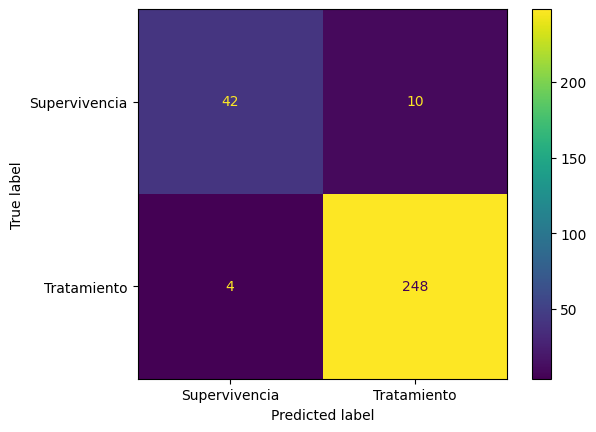

In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion = multilabel_confusion_matrix(y_test,y_pred)
print(f"acc: {accuracy_score(y_test,y_pred)}")
print(f"precision: {precision_score(y_test,y_pred,average='macro')}")
print(f"recall: {recall_score(y_test,y_pred,average='macro')}")
print(f"f1: {f1_score(y_test,y_pred,average='micro')}")
confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['Supervivencia','Tratamiento']).plot(values_format='d')

In [ ]:
MEJORA-quimioterapia

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['chemotherapy'],
                                                    test_size=0.2, random_state=57
                                                    )

In [136]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc: 0.9638157894736842
precision: 0.9381889763779527
recall: 0.9312950476633342
f1: 0.9638157894736842


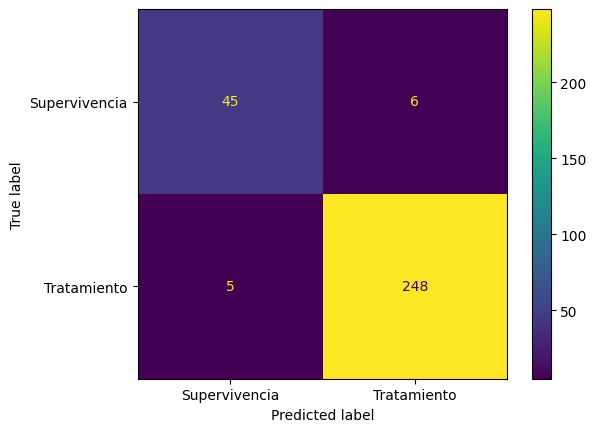

In [137]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion = multilabel_confusion_matrix(y_test,y_pred)
print(f"acc: {accuracy_score(y_test,y_pred)}")
print(f"precision: {precision_score(y_test,y_pred,average='macro')}")
print(f"recall: {recall_score(y_test,y_pred,average='macro')}")
print(f"f1: {f1_score(y_test,y_pred,average='micro')}")
confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['Supervivencia','Tratamiento']).plot(values_format='d')

tumor_otro_subtipo_histológico(2)

In [97]:
X = df.copy()
X = X.drop(['tumor_other_histologic_subtype (2)'], axis=1)
X

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,her2_status_measured_by_snp6 (2),her2_status (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area
0,43,0,1,3,1,0,2,0.000065,8.466155e-01,1,...,0,0,1,0,0,0,1,1,0,0.000276
1,76,1,1,3,1,8,2,0.000099,4.138046e-01,0,...,0,0,0,2,0,1,1,1,1,0.002373
2,78,0,1,3,1,0,4,0.006730,7.802601e-09,0,...,0,0,0,3,1,0,1,1,1,0.003653
3,86,0,1,3,1,1,5,0.008339,3.657886e-01,0,...,2,0,0,2,0,0,0,1,2,0.000916
4,84,0,1,2,0,0,1,0.005066,3.627876e-01,0,...,1,0,0,1,1,0,0,1,1,0.001644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,67,0,4,2,1,1,3,0.000065,2.410804e-08,0,...,0,0,0,1,1,0,1,5,2,0.012834
1512,63,0,4,2,1,6,6,0.000083,1.955985e-01,1,...,0,0,0,3,1,0,1,4,0,0.023726
1513,61,0,4,3,1,1,5,0.000082,2.030677e-08,0,...,0,0,0,10,0,0,0,5,2,0.012834
1514,66,0,4,3,1,3,2,0.000082,1.586862e-01,0,...,0,0,0,1,1,0,0,4,2,0.036559


In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['tumor_other_histologic_subtype (2)'],
                                                    test_size=0.2, random_state=42
                                                    )

In [146]:
X_train

,age_at_diagnosis,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,...,her2_status (2),tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area
137,73,1,3,0,5,4,0.000099,4.434812e-01,0,0,...,1,0,0,5,1,0,0,6,1,0.002979
372,73,1,3,1,0,1,0.006787,4.238079e-01,0,0,...,0,0,0,3,1,0,1,4,1,0.002797
1309,39,5,3,0,0,7,0.000065,8.476159e-01,0,0,...,1,0,1,0,1,0,0,0,2,0.010968
966,63,3,1,0,0,6,0.000032,1.313438e-08,0,0,...,0,0,0,6,1,0,1,5,2,0.000579
916,74,3,3,0,0,2,0.000066,1.915305e-01,0,1,...,0,1,0,8,1,1,1,4,2,0.001766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,49,2,3,0,1,6,0.008329,2.745915e-08,1,1,...,0,0,1,10,1,0,0,6,0,0.000674
442,60,2,3,1,0,8,0.006694,1.467823e-01,1,0,...,0,0,0,2,0,0,0,6,0,0.000549
1396,44,4,3,0,2,10,0.008378,7.165722e-01,0,0,...,1,0,1,5,1,0,0,6,1,0.010294
837,58,3,8,1,0,5,0.000032,1.984995e-01,1,0,...,0,2,0,1,1,2,0,5,0,0.000579


In [147]:
X_test

,age_at_diagnosis,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,...,her2_status (2),tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area
566,70,2,3,1,0,2,0.006700,1.088029e-01,1,1,...,0,0,0,0,1,0,1,4,0,0.000610
820,60,3,3,0,0,6,0.006720,1.241747e-01,0,1,...,0,0,0,7,0,0,0,0,2,0.001584
567,43,2,2,1,1,16,0.006687,1.887963e-01,1,0,...,0,1,1,6,0,1,1,5,0,0.000977
447,58,2,3,1,0,5,0.006684,1.590530e-08,0,1,...,0,1,0,0,0,1,1,5,1,0.000458
689,64,3,3,0,0,4,0.000065,2.927643e-01,0,0,...,0,0,0,7,1,0,0,0,2,0.000428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,69,2,3,1,7,8,0.000099,9.603201e-10,0,1,...,0,0,0,5,0,0,0,6,1,0.002649
287,59,1,3,1,3,5,0.000082,1.431811e-01,0,1,...,0,0,0,2,0,0,1,4,1,0.002069
995,47,3,2,0,0,4,0.000049,1.861954e-01,1,1,...,0,1,1,1,0,1,1,5,0,0.001766
425,40,2,2,0,0,12,0.005029,2.720240e-01,1,1,...,0,0,1,1,1,0,1,5,0,0.000488


In [148]:
y_train

137     0
372     0
1309    0
966     0
916     1
       ..
403     0
442     0
1396    0
837     2
1213    0
Name: tumor_other_histologic_subtype (2), Length: 1212, dtype: int64

In [149]:
y_test

566     0
820     0
567     1
447     1
689     0
       ..
470     0
287     0
995     1
425     0
1009    0
Name: tumor_other_histologic_subtype (2), Length: 304, dtype: int64

In [103]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc: 0.9506578947368421
precision: 0.5489154493138557
recall: 0.5403874269005848
f1: 0.9506578947368421


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


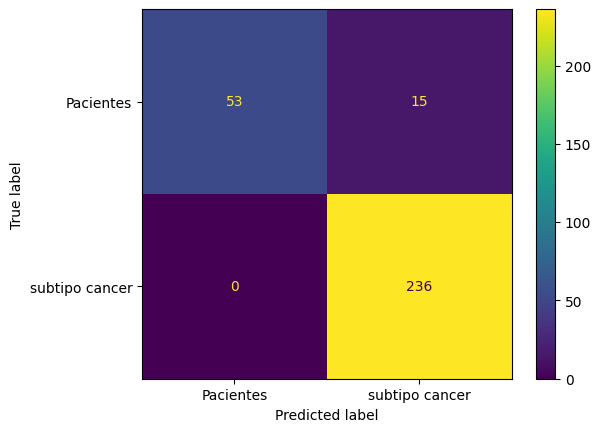

In [105]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion = multilabel_confusion_matrix(y_test,y_pred)
print(f"acc: {accuracy_score(y_test,y_pred)}")
print(f"precision: {precision_score(y_test,y_pred,average='macro')}")
print(f"recall: {recall_score(y_test,y_pred,average='macro')}")
print(f"f1: {f1_score(y_test,y_pred,average='micro')}")
confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['Pacientes','subtipo cancer']).plot(values_format='d')

MEJORA-tumor_otro_subtipo_histológico(2)

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['tumor_other_histologic_subtype (2)'],
                                                    test_size=0.2, random_state=46
                                                    )

In [150]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc: 0.9769736842105263
precision: 0.8460018963337548
recall: 0.7525132275132275
f1: 0.9769736842105263


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


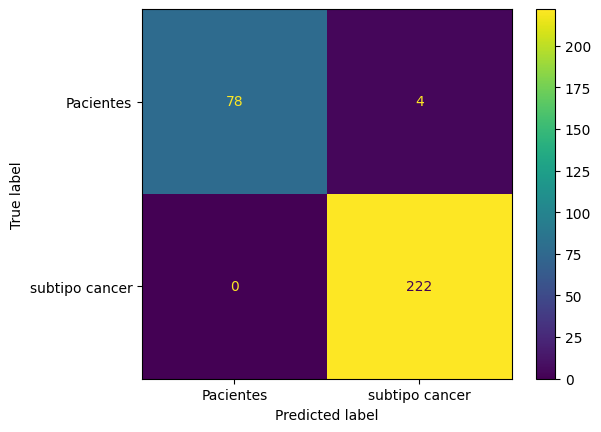

In [151]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion = multilabel_confusion_matrix(y_test,y_pred)
print(f"acc: {accuracy_score(y_test,y_pred)}")
print(f"precision: {precision_score(y_test,y_pred,average='macro')}")
print(f"recall: {recall_score(y_test,y_pred,average='macro')}")
print(f"f1: {f1_score(y_test,y_pred,average='micro')}")
confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['Pacientes','subtipo cancer']).plot(values_format='d')